In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [53]:
import numpy as np
n = 1000
x = [i-5 for i in range(0,n,1)]
y = [(i-1)*(i-1) for i in x]
# add noise 
y = [i+np.random.normal(0,1) for i in y]
print(x)
print(y)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [51]:
#fully connected
size_layer_0 = 20
size_layer_1 = 20
size_layer_2 = 20

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    inputs = tf.placeholder(tf.float32, shape=[None,1])
    labels = tf.placeholder(tf.float32, shape=[None,1])
    
    w0 = tf.Variable(tf.random_uniform([ 1,size_layer_0],-0.1,0.1, dtype=tf.float32))
    b0 = tf.Variable(tf.zeros([size_layer_0])) 
    
    w1 = tf.Variable(tf.random_uniform([ size_layer_0, size_layer_1],-0.1,0.1, dtype=tf.float32))
    b1 = tf.Variable(tf.zeros([size_layer_1]))
    
    w2 = tf.Variable(tf.random_uniform([ size_layer_1, size_layer_2],-0.1,0.1, dtype=tf.float32))
    b2 = tf.Variable(tf.zeros(size_layer_2))    
    
    w3 = tf.Variable(tf.random_uniform([ size_layer_2, 1],-0.1,0.1, dtype=tf.float32))
    b3 = tf.Variable(tf.zeros([1]))  
    
    def the_model(x):
        logits = tf.matmul(x,w0)+b0
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w1)+b1
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w2)+b2
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w3)+b3
        logits = tf.nn.relu(logits)
        return logits
    
    estimated_labels = the_model(inputs)
    loss = tf.reduce_mean(tf.squared_difference(estimated_labels, labels))
    
    optimizer = tf.train.AdagradOptimizer(0.01).minimize(loss)

0.0783785
0.0670418
0.06703
0.0670289
0.0670288
0.0670287
0.0670287
0.0670287
0.0670287
0.0670287
0.0670287


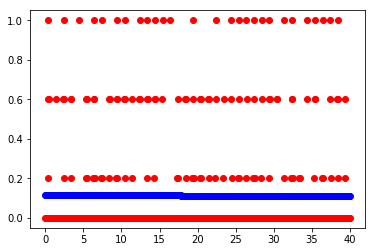

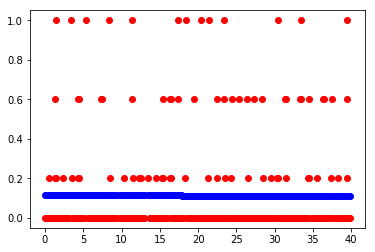

In [52]:
n_step = 10000
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for i in range(n_step):
        feed_dict = {inputs: train_x, labels: train_y}
        _, _loss, _estimated_labels = session.run([optimizer,loss,estimated_labels],feed_dict = feed_dict)
        if i % 1000 == 0:
            print(_loss)
    print(_loss)
    feed_dict = {inputs: test_x, labels: test_y}
    test_labels = estimated_labels.eval(feed_dict = feed_dict)

    
plot(train_x, train_y, _estimated_labels)
plot(test_x, test_y, test_labels)